# Data recording sheet

| Testing information | |
|---|---|
| Experiment | Rock vs No Rock |
| Description | Test effect of bicycle lean on maximal power output |
| Date | July 31, 2020 |
| Location | Locomotion Laboratory  |
| Subject | UI |
| Calibration factor | 278 |

---
## Protocol

- Charge Garmin, iPad, and IMUs
- Consent form
- Attach IMUs (frame=2050 , crank=2431)
- Set saddle height and handlebar position
- Sanitize bicycle
- Calibrate power meter
- Warm up
- Familiarization trials
- Pmax Test
- Begin experimental trials
  - Sync IMUs with Garmin at start and end of each trial 
- Gift card & signature

| Conditions ||
|---|---|
| 1 | Ad libitum |
| 2 | Self-restricted |
| 3 | Locked |

| Trial order ||
|---|---|
| Warm Up | 5 min at 100 W (3.5 lb) |
| Famil. | Standing and leaning (8.5 lb) |
| Pmax Test | 1, 1, 1 |
| Block 1 | 1, 2, 3 |
| Block 2 | 3, 1, 2 |
| Block 3 | 2, 3, 1 |

---
## Results

| Environmental conditions | |
|---|---|
| Temp. (C) | 21 |
| Humidity (%) | 48 |
| Pressure (mmHg) | 638 |
| Altitude (m) | 1641 |

| Subject characteristics ||
|---|---|
| Sex | M |
| Age (yrs) |  |
| Mass (lb/kg) | 152 / 69 |
| Height (ft/m) | 6'1" / 1.85 |

In [1]:
import numpy as np

mass = 152
listPerc = [0.06, 0.12, 0.18]
listRes = np.array(listPerc)*mass
listRes

array([ 9.12, 18.24, 27.36])

### Pmax Test

| Condition | Trial | Hanging Weight (Lbs) | Power  (W) | Cadence (RPM) | 
| --- | --- | --- | --- | --- |
| 1 | 1 | 12.5  | 971 | 157 |
| 1 | 2 | 18.5  | 1143 | 118 |
| 1 | 3 | 22.5  | 1141 | 104 |

Predicted maximal power output is 1153.6666666666654
Predicted optimal hanging weight is 20.5


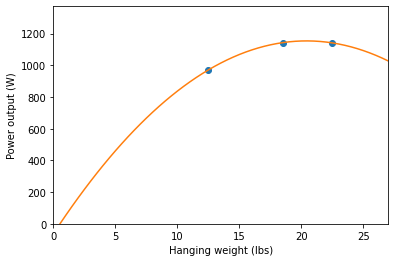

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# set data
x = [12.5, 18.5, 22.5]
y = [971, 1143, 1141]

# calculate polynomial 
c = np.polyfit(x,y,2)
poly = np.poly1d(c)

# calculate new x and y values
new_x = np.linspace(0, 50, 101)
new_y = poly(new_x)

# plot the polynomial
plt.plot(x, y, "o", new_x, new_y)
plt.xlim([0, max(x)*1.2])
plt.ylim([0, max(y)*1.2])
plt.xlabel('Hanging weight (lbs)')
plt.ylabel('Power output (W)')

ind = np.argmax(new_y)
xOpt = new_x[ind]
yOpt = max(new_y)

print("Predicted maximal power output is", yOpt)
print("Predicted optimal hanging weight is", xOpt)

## Experimental Results
* Record directly to dataframe

In [6]:
# create data table
import pandas as pd
import numpy as np

data = pd.DataFrame(np.array([
                              [2, 0, 1, 12.5, 971, 157], 
                              [2, 0, 2, 18.5, 1143, 118], 
                              [2, 0, 3, 22.5, 1141, 104],
                              [2, 1, 1, 19.5, 1033, 111], 
                              [2, 2, 1, 19.5, 1020, 116], 
                              [2, 3, 1, 19.5, 1146, 122],
                              [2, 2, 2, 19.5, 1079, 120],
                              [2, 3, 2, 19.5, 1135, 124],
                              [2, 1, 2, 19.5, 1030, 116],
                              [2, 3, 3, 19.5, 1168, 123],
                              [2, 1, 3, 19.5, 1122, 119],
                              [2, 2, 3, 19.5, 1075, 124]
                              ]),
                    columns=['subject', 'condition', 'trial', 'hanging weight', 'power', 'cadence'])
data

,subject,condition,trial,hanging weight,power,cadence
0,2.0,0.0,1.0,12.5,971.0,157.0
1,2.0,0.0,2.0,18.5,1143.0,118.0
2,2.0,0.0,3.0,22.5,1141.0,104.0
3,2.0,1.0,1.0,19.5,1033.0,111.0
4,2.0,2.0,1.0,19.5,1020.0,116.0
5,2.0,3.0,1.0,19.5,1146.0,122.0
6,2.0,2.0,2.0,19.5,1079.0,120.0
7,2.0,3.0,2.0,19.5,1135.0,124.0
8,2.0,1.0,2.0,19.5,1030.0,116.0
9,2.0,3.0,3.0,19.5,1168.0,123.0


##Data Analysis
* Mean and SD power and cadence

In [7]:
# calculate condition mean
data.groupby('condition')[['power','cadence']].mean()

,power,cadence
condition,,
0.0,1085.000000,126.333333
1.0,1061.666667,115.333333
2.0,1058.000000,120.000000
3.0,1149.666667,123.000000


In [8]:
# calculate condition sd
data.groupby('condition')[['power','cadence']].std()

,power,cadence
condition,,
0.0,98.731960,27.465129
1.0,52.271726,4.041452
2.0,32.969683,4.000000
3.0,16.802778,1.000000
